In [1]:
import pathlib
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
new_base_dir = pathlib.Path("./cats_vs_dogs_small")

In [3]:
# data preprocessing
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [4]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [5]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [7]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [8]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 16s 121ms/step - loss: 0.6992 - accuracy: 0.5280 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 4s 60ms/step - loss: 0.6929 - accuracy: 0.5315 - val_loss: 0.7080 - val_accuracy: 0.5060
Epoch 3/100
63/63 [==============================] - 5s 83ms/step - loss: 0.6883 - accuracy: 0.5525 - val_loss: 0.7108 - val_accuracy: 0.5160
Epoch 4/100
63/63 [==============================] - 4s 60ms/step - loss: 0.6718 - accuracy: 0.5985 - val_loss: 0.6615 - val_accuracy: 0.5870
Epoch 5/100
63/63 [==============================] - 4s 61ms/step - loss: 0.6654 - accuracy: 0.6135 - val_loss: 0.6429 - val_accuracy: 0.6200
Epoch 6/100
63/63 [==============================] - 6s 89ms/step - loss: 0.6555 - accuracy: 0.6070 - val_loss: 0.6599 - val_accuracy: 0.6120
Epoch 7/100
63/63 [==============================] - 4s 62ms/step - loss: 0.6427 - accuracy: 0.6265 - val_loss: 0.6489 - val_accuracy: 0.6250
Epoc

In [9]:
import matplotlib.pyplot as plt


def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

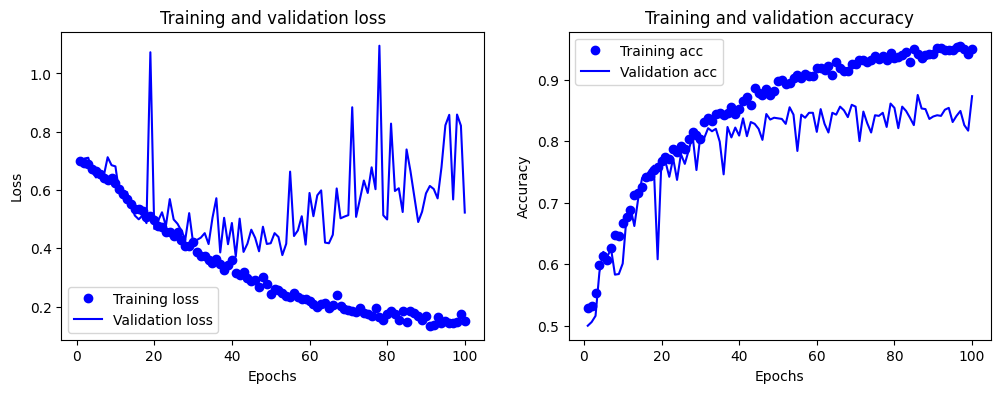

In [10]:
show_history(history)

In [11]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 31ms/step - loss: 0.4027 - accuracy: 0.8340
Test accuracy: 0.834
